# Representación de textos

En esta notebook, veremos diferentes técnicas de representación de textos como "Bag of Words" (BoW) , "Term Frequency – Inverse Document Frequency" (TF-IDF), Word2vec y una implementación de Spacy para generar "embeddings".

# Datos

Los datos que utilizaremos a lo largo de este notebook será un dataset alojado en Kaggle el cual contiene artículos de noticias de la BBC.

Columnas del dataset: "text" (texto) y "category" (categoría)

<br>

Enlace: https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

Dataset: https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

Utilizaremos la librería pandas para cargar el contenido del dataset en un objeto

In [ ]:
# Para descargar la librería puedes utilizar la siguiente instrucción:
# !pip install pandas

In [1]:
# Importamos la librería pandas
import pandas as pd

In [2]:
# Por medio de la función "read_csv" de pandas, descargaremos el dataset
df = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")

In [3]:
# Con el atributo "shape" podemos conocer las dimensiones del dataframe
df.shape

(2225, 2)

In [4]:
# Muestra aleatoria de 5 filas del dataframe
df.sample(5)

,category,text
197,politics,lib dems predict best ever poll the lib dems...
703,sport,owen set for skipper role wales number eight m...
53,business,pernod takeover talk lifts domecq shares in uk...
1546,sport,hewitt overcomes wobble in sydney lleyton hewi...
1668,sport,johnson too strong for gb runners britain s ka...


In [5]:
# Categorías de las noticias
df["category"].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

# Preprocesamiento

In [ ]:
# Para descargar la librería spaCy puedes utilizar la siguiente instrucción:
# !pip install spacy

In [6]:
# Importamos la librería spaCy
import spacy

In [7]:
# Descargamos los paquetes necesarios del inglés
!python -m spacy download en_core_web_md
# Cargamos los paquetes al spaCy
nlp = spacy.load("en_core_web_md")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# Para descargar la librería nltk puedes utilizar la siguiente instrucción:
# !pip install nltk

In [8]:
# Importamos la librería nltk
import nltk

In [9]:
# Descargamos los paquetes de puntuación
nltk.download("punkt")
# De stopwords
nltk.download("stopwords")
# Y también la wordnet
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /home/win7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/win7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/win7/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Importamos algunos objetos necesarios para realizar el preprocesamiento de la información
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [12]:
# Nos devuelve la información de la columna "texto" del dataframe
df["text"]

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [14]:
# Juntamos todas las noticias en una sola cadena.
# Luego tokenizamos la cadena completa y obtenemos la frecuencia de los tokens
tokens_frequency = FreqDist(word_tokenize(' '.join(df["text"])))
tokens_frequency

FreqDist({'the': 52604, '.': 39359, 'to': 25002, 'of': 19970, 'and': 18572, 'a': 18282, 'in': 17629, 's': 9049, 'for': 8918, 'is': 8555, ...})

In [15]:
# Obtenemos la lista de los 20 tokens más frecuentes
tokens_frequency.most_common(20)

[('the', 52604),
 ('.', 39359),
 ('to', 25002),
 ('of', 19970),
 ('and', 18572),
 ('a', 18282),
 ('in', 17629),
 ('s', 9049),
 ('for', 8918),
 ('is', 8555),
 ('that', 8255),
 ('it', 7892),
 ('on', 7537),
 ('said', 7254),
 ('was', 6028),
 ('he', 5936),
 ('be', 5800),
 ('with', 5344),
 ('as', 4979),
 ('has', 4956)]

In [16]:
# Número de tokens:
print("Número de tokens: {}".format(tokens_frequency.N()))
# Tamaño del vocabulario o número de "types"
print("Tamaño del vocabulario: {}".format(len(tokens_frequency)))

Número de tokens: 917506
Tamaño del vocabulario: 33994


Ahora, realizaremos una limpieza "básica" de los datos

In [17]:
# Lista de stopwords en inglés
stop_words = stopwords.words("english")

# Ahora, para cada token, se convertirá en minúscula. Y la nueva lista de token estará compuesta por tokens que solo contengan letras y
# que no sean una stopword.
def text_preprocess(text: str) -> str:
    tokens = [token for token in word_tokenize(text.lower()) if (token.isalpha() and (token not in stop_words))]

    return ' '.join(tokens)

In [18]:
# Creamos una nueva columna en el dataframe, esta columna tendrá las noticias con el texto pre-procesado.
df["text_preprocessed"] = df.text.apply(text_preprocess)

In [19]:
# Visualizamos la nueva columna "text_preprocessed" del dataframe
df["text_preprocessed"]

0       tv future hands viewers home theatre systems p...
1       worldcom boss left books alone former worldcom...
2       tigers wary farrell gamble leicester say rushe...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raids box office ocean twelve cri...
                              ...                        
2220    cars pull us retail figures us retail sales fe...
2221    kilroy unveils immigration policy host robert ...
2222    rem announce new glasgow concert us band rem a...
2223    political squabbles snowball become commonplac...
2224    souness delight euro progress boss graeme soun...
Name: text_preprocessed, Length: 2225, dtype: object

Y volvemos a hacer nuevamente el ejercicio para conocer la frecuencia de los tokens, número de tokens y el tamaño del vocabulario

In [20]:
# Juntamos todas las noticias preprocesadas en un sola cadena.
# Luego tokenizamos la cadena completa y obtenemos la frecuencia de los tokens
tokens_frequency = FreqDist(word_tokenize(' '.join(df["text_preprocessed"])))
tokens_frequency

FreqDist({'said': 7254, 'mr': 2994, 'would': 2577, 'also': 2156, 'people': 2044, 'new': 1970, 'us': 1932, 'year': 1829, 'one': 1763, 'could': 1511, ...})

In [21]:
# Obtenemos la lista de los 20 tokens más frecuentes
tokens_frequency.most_common(20)

[('said', 7254),
 ('mr', 2994),
 ('would', 2577),
 ('also', 2156),
 ('people', 2044),
 ('new', 1970),
 ('us', 1932),
 ('year', 1829),
 ('one', 1763),
 ('could', 1511),
 ('last', 1381),
 ('first', 1282),
 ('world', 1186),
 ('two', 1181),
 ('government', 1154),
 ('time', 1147),
 ('uk', 1079),
 ('years', 1002),
 ('make', 927),
 ('best', 926)]

In [22]:
# Número de tokens:
print("Número de tokens: {}".format(tokens_frequency.N()))
# Tamaño del vocabulario o número de "types"
print("Tamaño del vocabulario: {}".format(len(tokens_frequency)))

Número de tokens: 468659
Tamaño del vocabulario: 27256


# WordCloud

Las WordCloud (nubes de palabras) son herramientas útiles para resumir los conceptos más importantes de un texto, una página web o un libro. Existe una librería WordCloud en python que nos ayudará para crear una WordCloud

Documentación: https://amueller.github.io/word_cloud/index.html


In [ ]:
# Para descargar la librería WordCloud puedes utilizar la siguiente instrucción:
# !pip install wordcloud

In [25]:
# Importamos la librería WordCloud
from wordcloud import WordCloud
# Y otra que nos ayudará para la visualización de gráficos
import matplotlib.pyplot as plt

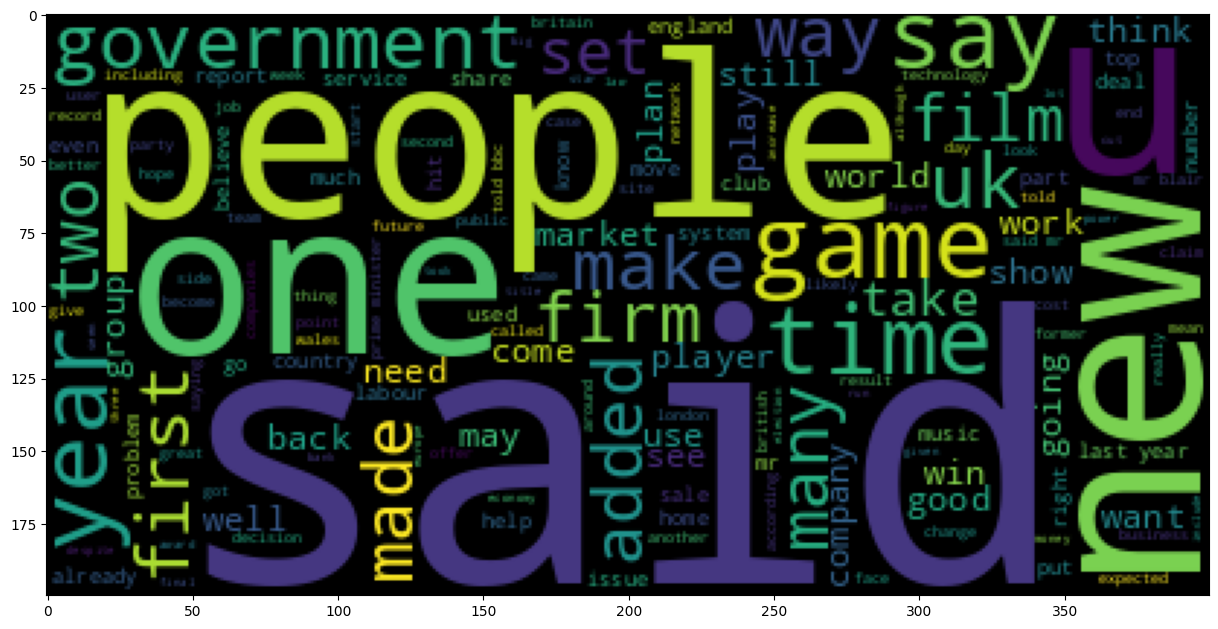

In [26]:
# Generamos el "word cloud" de todas las noticias
wordcloud = WordCloud().generate(" ".join(df.text_preprocessed))
plt.figure(figsize=[15,8])
plt.imshow(wordcloud)

# Modelo de clasificación

Crearemos un modelo probabilístico Naive Bayes para probar las diferentes técnicas de representación de textos. El objetivo es experimentar si el modelo logra clasificar correctamente las categorias de las noticias en cada tipo de representación de textos.

División de los conjuntos de datos: 80% para entrenamiento y 20% para pruebas.

In [28]:
# !pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/8f/87/5969092159207f583481ad80a03f09e2d4af1ebd197f4530ca4e906c947e/scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 12.1 MB/s eta 0:00:0000:0100:01


In [29]:
# Utilizaremos las funciones de Scikit-Learn para la división de los conjuntos de datos
from sklearn.model_selection import train_test_split

In [30]:
# Utilizamos la función train_test_split para separar nuestro conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(df["text_preprocessed"], df["category"], test_size=0.2, random_state=2023)

In [31]:
# Dimensiones del conjunto de datos de entrenamiento
X_train.shape, y_train.shape

((1780,), (1780,))

In [32]:
# Dimensiones del conjunto de datos de pruebas
X_test.shape, y_test.shape

((445,), (445,))

Ahora, implementaremos una función en dónde al pasarle un conjunto de datos de entrenamiento y pruebas, entrenará un modelo de aprendizaje Naive Bayes y nos devolverá el "accuracy" del conjunto de datos prueba.

In [33]:
# Importamos las librerías necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [34]:
# Creamos la función que entrenará un modelo Naive Bayes y nos devolverá el "acccuracy" del conjunto de datos de pruebas
def train_Naive_Bayes_and_get_accuracy(X_train, y_train, X_test, y_test):
    # Entrenamos el modelo con el conjunto de datos de entrenamiento
    classifier = GaussianNB().fit(X_train, y_train)
    # Predecimos las categorias para el conjunto de datos de pruebas
    y_pred = classifier.predict(X_test)
    # Obtenemos el accuracy entre lo real y las predicciones
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy * 100

# Modelos de representación de textos

## 1. Bag of Words (BoW)

Bag of words (BoW) es un modelo de lenguaje estadístico que se utiliza para analizar textos y documentos en función del recuento de palabras. El modelo solo se preocupa por si las palabras conocidas aparecen en el documento, no en qué parte del documento.

Para hacer el recuento de palabras utilizaremos CountVectorizer.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [35]:
# Importamos la función "CountVectorizer"
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
# Instanciamos un nuevo objeto "CountVectorizer"
bow = CountVectorizer()
# "Entrena" el diccionario de vocabulario y devuelva la matriz documento-término.
# Le enviamos todas las noticias en una lista, cada elemento de la lista sería como un documento y las palabras serían los términos
bow.fit(X_train.values.tolist() + X_test.values.tolist())

CountVectorizer()

In [37]:
# Ahora obtendremos las matrices documento-término de los conjuntos de datos de entrenamiento y pruebas.
# La función transform devuelve un objeto csr_matrix, lo convertimos a un array
X_train_bow = bow.transform(X_train.values).toarray()
X_test_bow = bow.transform(X_test.values).toarray()

In [38]:
# Dimensiones de los conjuntos de datos de entrenamiento y pruebas
X_train_bow.shape, X_test_bow.shape

((1780, 27239), (445, 27239))

In [39]:
# Matriz documento-términos del conjunto de datos de entrenamiento
X_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
# Solo por motivos de una mejor visualización de los datos, convertiremos la matriz a un dataframe
df_bow = pd.DataFrame(X_train_bow, columns=bow.get_feature_names_out())
df_bow

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,aara,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Entrenamos el modelo con las matrices y obtenemos el acurracy con la data de test
train_Naive_Bayes_and_get_accuracy(X_train_bow, y_train, X_test_bow, y_test)

91.91011235955057

## 2. TF-IDF (Term Frequency times Inverse Document Frequency)

A diferencia de BoW, este nuevo modelo mide con qué frecuencia aparece un término dentro de un documento determinado, y lo compara con el número de documentos que mencionan ese término dentro de una colección entera de documentos.

Para calcular la matriz TF-IDF utilizaremos la función "TfidfVectorizer" de Scikit-Learn.

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [42]:
# Importamos la función "TfidfVectorizer"
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Instanciamos un nuevo objeto "TfidfVectorizer"
tfidf = TfidfVectorizer()
# "Entrena" el diccionario de vocabulario y devuelva la matriz.
# Le enviamos todas las noticias en una lista, cada elemento de la lista sería como un documento y las palabras serían los términos
tfidf.fit(X_train.values.tolist() + X_test.values.tolist())

TfidfVectorizer()

In [44]:
# Ahora obtendremos las matrices de los conjuntos de datos de entrenamiento y pruebas.
# La función transform devuelve un objeto csr_matrix, lo convertimos a un array
X_train_tfidf = tfidf.transform(X_train.values).toarray()
X_test_tfidf = tfidf.transform(X_test.values).toarray()

In [45]:
# Dimensiones de los conjuntos de datos de entrenamiento y pruebas
X_train_tfidf.shape, X_test_tfidf.shape

((1780, 27239), (445, 27239))

In [46]:
# Matriz del conjunto de datos de entrenamiento
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
# Solo por motivos de una mejor visualización de los datos, convertiremos la matriz a un dataframe
df_tfidf = pd.DataFrame(X_train_tfidf, columns=bow.get_feature_names_out())
df_tfidf

,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aan,aara,...,zooms,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Entrenamos el modelo con las matrices y obtenemos el acurracy con la data de test
train_Naive_Bayes_and_get_accuracy(X_train_tfidf, y_train, X_test_tfidf, y_test)

90.3370786516854

## 3. Entrenamiento de Word Embeddings

Es una técnica de procesamiento de lenguaje natural que consiste, básicamente, en asignar un vector a cada palabra. Este vector guarda información semántica, lo que permite que pueda ser asociado o disociado a otros vectores (palabras) según distintos contextos gramaticales.

Para eso utilizaremos la implementación Word2Vec de Gensim.

Documentación: https://radimrehurek.com/gensim/auto_examples/index.html

Ejemplo: https://code.google.com/archive/p/word2vec/

In [49]:
# Importamos la función "Word2Vec"
from gensim.models import Word2Vec

In [50]:
# Tokenizamos a nivel de palabras todas las noticias
sentences = [word_tokenize(doc) for doc in df["text_preprocessed"]]

In [51]:
print(sentences[:5])

[['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'tvs', 'digital', 'video', 'recorders', 'moving', 'living', 'room', 'way', 'people', 'watch', 'tv', 'radically', 'different', 'five', 'years', 'time', 'according', 'expert', 'panel', 'gathered', 'annual', 'consumer', 'electronics', 'show', 'las', 'vegas', 'discuss', 'new', 'technologies', 'impact', 'one', 'favourite', 'pastimes', 'us', 'leading', 'trend', 'programmes', 'content', 'delivered', 'viewers', 'via', 'home', 'networks', 'cable', 'satellite', 'telecoms', 'companies', 'broadband', 'service', 'providers', 'front', 'rooms', 'portable', 'devices', 'one', 'technologies', 'ces', 'digital', 'personal', 'video', 'recorders', 'dvr', 'pvr', 'boxes', 'like', 'us', 'tivo', 'uk', 'system', 'allow', 'people', 'record', 'store', 'play', 'pause', 'forward', 'wind', 'tv', 'programmes', 'want', 'essentially', 'technology', 'allows', 'much', 'personalised', 'tv', 'also', 'tv', 'sets', 'big', 'business', 'japan', 'us', 

In [52]:
%%time
# size: Número de dimension de los vectores de las palabras/tokens
# window: distancia máxima entre la palabra actual y la predicha dentro de una oración
# sg: 0 para CBOW Y 1 para skip-gram
n_dim = 100
model = Word2Vec(sentences, vector_size=n_dim, window=5, sg=1)

CPU times: user 15.9 s, sys: 19 ms, total: 15.9 s
Wall time: 5.57 s


In [53]:
# Con el método "similarity" podemos conocer que tan similiares son dos palabras (vectores)
model.wv.similarity("man", "woman")

0.7208404

In [54]:
model.wv.similarity("king", "queen") # use this for homework

0.8464425

In [55]:
model.wv.similarity("king", "digital")

0.27499563

In [56]:
model.wv["king"]

array([-0.00505305,  0.30198565,  0.13649452, -0.10535427, -0.01041357,
       -0.4783488 ,  0.20547849,  0.3429073 ,  0.12387972, -0.36040774,
       -0.21152844, -0.04655456,  0.03039048, -0.07947323, -0.03313822,
       -0.1900708 ,  0.08792822, -0.2521933 , -0.01653994, -0.33842123,
        0.26368922,  0.1539413 ,  0.22692451,  0.15608314,  0.0069454 ,
        0.00059423,  0.1348403 , -0.11655086,  0.05133775,  0.04400241,
        0.08722788,  0.16281731, -0.05090575,  0.11063534,  0.19904153,
        0.00123803, -0.1462931 , -0.293704  ,  0.12043626, -0.41592652,
        0.08506092, -0.25452873, -0.00432633,  0.15093729,  0.14324136,
       -0.3948959 , -0.17538284, -0.06569578,  0.06099243,  0.14700197,
        0.09925839, -0.08635654, -0.15984502, -0.19617838, -0.11034695,
        0.43272617,  0.3915908 ,  0.28713417, -0.15253451,  0.05498385,
        0.06919543, -0.08481618, -0.27325594, -0.07784244, -0.16453409,
        0.17671323, -0.15262462, -0.10011835, -0.06577072,  0.12

In [78]:
a = model.wv["king"] - model.wv["man"] + model.wv["woman"]
a

array([ 0.04353652,  0.18310699,  0.08354611, -0.3215549 ,  0.02305342,
       -0.6365132 ,  0.3050363 ,  0.5591029 ,  0.3024786 , -0.45454335,
       -0.21626925, -0.26042902, -0.06193651,  0.22523548, -0.1967532 ,
       -0.09458669, -0.12686503, -0.38209793, -0.11479176, -0.09884124,
        0.19549698,  0.03527319,  0.1549927 ,  0.24421032, -0.13330139,
        0.19240305,  0.1612455 , -0.522211  ,  0.27927178,  0.38876107,
        0.11891332, -0.02153382,  0.1837855 ,  0.10412675,  0.01372354,
       -0.24889722, -0.25444096, -0.25132358,  0.14512809, -0.33662242,
        0.19577235, -0.15537995,  0.02596106,  0.30116606,  0.51989776,
       -0.42916   , -0.21808463, -0.03773867, -0.12742022,  0.12995872,
       -0.05231722,  0.01140684, -0.38421267, -0.16452593, -0.09646794,
        0.5066222 ,  0.45028424,  0.17489189,  0.08328846, -0.24264984,
        0.1827096 , -0.19201672, -0.22848907,  0.00887853, -0.32258528,
        0.21722816, -0.09591341, -0.06760627, -0.1538586 ,  0.16

In [79]:
model.wv["queen"]

array([-0.01550316,  0.40013584,  0.1497041 , -0.05501923,  0.02597458,
       -0.2890737 ,  0.20168766,  0.46921375,  0.02668422, -0.1298612 ,
       -0.22062916, -0.1517152 ,  0.06715796,  0.02545576,  0.00254539,
       -0.10235113,  0.08538859, -0.31047025, -0.07224084, -0.29739013,
        0.28476107,  0.07263516,  0.13689367,  0.24802196, -0.14912102,
       -0.01541879,  0.01846025, -0.30175677, -0.10178945, -0.02654217,
        0.11496343, -0.03641912, -0.07468513,  0.07806827,  0.08661667,
       -0.02717832, -0.08981812, -0.05238464,  0.08988482, -0.44029486,
       -0.08016397, -0.2017179 , -0.00118732,  0.35487822, -0.02730299,
       -0.3482558 , -0.2286773 ,  0.0371632 , -0.12602024,  0.22192149,
       -0.0318542 , -0.14982827, -0.05788329, -0.14585595, -0.18214583,
        0.34520426,  0.30786803,  0.23204108, -0.01290822,  0.01311713,
        0.12470066, -0.17391005, -0.10699008,  0.10518254, -0.21330748,
        0.10301612, -0.09432555, -0.0026074 , -0.2018223 , -0.02

In [57]:
# Con el método "most_similar" podemos conocer cuales son las palabras (vectores) más similares a otra palabra.
model.wv.most_similar("king")

[('mann', 0.9490319490432739),
 ('roberts', 0.926693320274353),
 ('spacey', 0.9237047433853149),
 ('hanks', 0.9204110503196716),
 ('designer', 0.9198944568634033),
 ('hackford', 0.9197607636451721),
 ('graham', 0.9178315997123718),
 ('gogh', 0.9173864126205444),
 ('tom', 0.9149505496025085),
 ('diana', 0.9145369529724121)]

In [58]:
model.wv.most_similar("queen")

[('fry', 0.9486876726150513),
 ('diaries', 0.9410879015922546),
 ('itv', 0.9363476634025574),
 ('sitcom', 0.9347203969955444),
 ('presenters', 0.9341301918029785),
 ('osbourne', 0.9328715801239014),
 ('hall', 0.9326735138893127),
 ('concert', 0.932181715965271),
 ('devon', 0.9320995211601257),
 ('mother', 0.9320666193962097)]

Ahora para cada documento, obtendremos un arreglo de vectores de palabras. Luego, promediaremos ese arreglo de vectores para que nos quede un arreglo promedio para el documento.

In [59]:
# Importamos numpy que nos ayudarára para los manejos de arreglos
import numpy as np

In [60]:
# Implemetamos una función que dado un texto, nos devuelva el promedio de los vectores de palabras
def document_mean_vector(text: str):
    word_vectors = [model.wv[token] if token in model.wv else np.zeros(n_dim) for token in word_tokenize(text)]

    return np.asarray(word_vectors).mean(axis=0)

In [61]:
# Ejemplo
document_words_vectors_example = [model.wv[token] if token in model.wv else np.zeros(n_dim) for token in word_tokenize("tv future in the hands")]
print(document_words_vectors_example)
print("Dimensiones: {}".format(np.shape(document_words_vectors_example)))

print("-" * 100)

document_mean_vector_example = np.asarray(document_words_vectors_example).mean(axis=0)
print(document_mean_vector_example)
print("Dimensiones: {}".format(np.shape(document_mean_vector_example)))

[array([-0.3733349 ,  0.2743437 ,  0.21712676, -0.15391876,  0.4097975 ,
       -0.17075485,  0.84206367,  0.61352855,  0.09750533,  0.18780136,
        0.0905988 , -0.1806158 , -0.02418072,  0.01132044, -0.25540847,
       -0.3884583 , -0.1091567 ,  0.02704812, -0.04064065, -0.4051833 ,
        0.42964438, -0.04035745, -0.1304949 ,  0.35368383, -0.5090875 ,
        0.18782824, -0.25674996, -0.53882354, -0.16854453, -0.04315298,
        0.09397269, -0.40622863, -0.2771614 ,  0.29582733,  0.35868004,
       -0.2611702 ,  0.30358118, -0.08393347, -0.01445033, -0.12645963,
       -0.15109737, -0.34188995,  0.09682077,  0.5476975 , -0.0597071 ,
       -0.27805895,  0.16396122,  0.07336634,  0.13274516,  0.5104487 ,
        0.23817639, -0.41975924,  0.35936797,  0.38698283, -0.11239005,
        0.39839107,  0.21736816,  0.23811702, -0.123734  , -0.0263462 ,
        0.22944756, -0.3800979 , -0.21709274,  0.25105482, -0.28729233,
        0.4960641 , -0.33918026,  0.09518208, -0.26607245, -0.3

In [62]:
# Ahora obtendremos las matrices de los conjuntos de datos de entrenamiento y pruebas.
# Para cada documento, obtenemos el promedio de los vectores de las palabras
X_train_w2v = np.stack([document_mean_vector(doc) for doc in X_train])
X_test_w2v = np.stack([document_mean_vector(doc) for doc in X_test])

In [63]:
# Dimensiones de los conjuntos de datos de entrenamiento y pruebas
X_train_w2v.shape, X_test_w2v.shape

((1780, 100), (445, 100))

In [64]:
# Entrenamos el modelo con las matrices y obtenemos el acurracy con la data de test
train_Naive_Bayes_and_get_accuracy(X_train_w2v, y_train, X_test_w2v, y_test)

95.73033707865169

## 4. Word Embeddings preentrenados

SpaCy tiene un modelo preentrenado para generar Word Embeddings

Documentación: https://spacy.io/usage/embeddings-transformers#static-vectors

In [65]:
# Cargamos los paquetes al spaCy
nlp = spacy.load("en_core_web_md")

In [66]:
# Obtenemos las dimensiones del vector de la palabra "man"
nlp("man").vector.shape

(300,)

In [67]:
# Obtenemos el vector para la palabra "man"
nlp("man").vector

array([ -1.2867  ,  -0.7992  ,  -2.092   ,  -0.77679 ,  -2.5057  ,
         2.7123  ,   0.59127 ,   3.2927  ,  -1.5826  ,   6.4515  ,
         1.3452  ,  -1.9711  ,   0.93059 ,   2.8943  ,   4.2116  ,
         1.6     ,   2.6821  ,  -8.4476  ,   2.3301  ,   6.0751  ,
        -0.39937 ,   7.3433  ,  -2.2546  ,  -5.9357  ,   3.6748  ,
        -4.9191  ,  -3.1941  ,  -4.2882  ,   3.4951  ,  -3.1585  ,
         0.69749 ,   0.48132 ,  -0.6059  ,   0.22147 ,  -2.9045  ,
         0.27525 ,  -6.0088  ,   5.0995  ,  -3.367   ,   2.6089  ,
        -5.6207  ,  -2.6762  ,   6.0931  ,   3.1168  ,   3.2641  ,
        -4.0576  ,  -4.435   ,   1.4214  ,   0.59049 ,   8.941   ,
         2.0718  ,   5.3188  ,   2.8866  ,   0.0945  ,  -0.25755 ,
         0.93984 ,   7.9412  ,  -2.2701  ,  -0.65029 ,   1.4952  ,
        -2.5503  ,  -3.7978  ,  -5.853   ,  -1.7847  ,   1.4484  ,
        -3.9781  ,  -1.3968  , -10.793   ,  -4.5546  ,  -0.12542 ,
         4.4986  ,   1.7492  ,   0.50073 ,  -1.1922  ,   2.040

In [68]:
# De modo similiar que con la librería Gensim, podemos conocer que tan similares son dos palabras de acuerdo al modelo a través del
# método "similarity"
nlp("man").similarity(nlp("woman"))

0.8273442557707831

In [69]:
nlp("king").similarity(nlp("queen"))

0.6108841234425123

In [70]:
nlp("king").similarity(nlp("digital"))

0.1270155080274114

In [71]:
# También puedes obtener el vector promedio de un texto/documento
nlp("I liked the movie").vector

array([-3.08952498e+00,  6.64805055e-01, -1.67632496e+00, -4.19902515e+00,
       -2.54250002e+00, -1.28041995e+00,  1.79774249e+00,  4.55297518e+00,
       -2.29584241e+00,  2.63876987e+00,  5.56137514e+00,  3.03064990e+00,
       -3.06488490e+00, -8.13535035e-01,  2.58832741e+00, -1.02951956e+00,
        2.87489986e+00, -2.51019001e+00, -1.09834492e+00,  9.69875038e-01,
        3.76797485e+00,  1.34805012e+00,  9.40129995e-01, -4.35134983e+00,
       -1.06940007e+00,  2.03649938e-01, -3.02675009e+00, -1.25267595e-01,
       -1.01871490e+00,  2.11891508e+00, -9.97025013e-01, -1.10940015e+00,
       -6.17625058e-01,  4.69953716e-02, -1.10035491e+00, -9.56925035e-01,
       -1.83794749e+00,  1.13381994e+00,  3.38330507e+00, -5.68925023e-01,
       -2.35082507e+00,  1.99583745e+00, -4.96919990e-01, -2.85846472e+00,
        3.19807506e+00,  1.19086754e+00, -3.61232519e+00, -3.50703979e+00,
       -7.03150034e-02,  1.83410001e+00,  8.08850303e-02,  1.00950003e+00,
        1.35545003e+00, -

In [72]:
%%time

# Ahora obtendremos las matrices de los conjuntos de datos de entrenamiento y pruebas.
X_train_pw2v = np.stack([nlp(text).vector for text in X_train])
X_test_pw2v = np.stack([nlp(text).vector for text in X_test])

CPU times: user 1min 8s, sys: 50 ms, total: 1min 8s
Wall time: 1min 9s


In [73]:
# Dimensiones de los conjuntos de datos de entrenamiento y pruebas
X_train_pw2v.shape, X_test_pw2v.shape

((1780, 300), (445, 300))

In [74]:
# Entrenamos el modelo con las matrices y obtenemos el acurracy con la data de test
train_Naive_Bayes_and_get_accuracy(X_train_pw2v, y_train, X_test_pw2v, y_test)

91.68539325842696